# **Part I (75 points):  Apply Machine Learning approaches on MNIST Handwritten Digit Dataset**

## **Step 1 (1 points). Prepare the MNIST dataset**

**Following the steps in:** Week 2-Lab I: Intro to Classification - Image classification, load the MNIST dataset from tensorflow package into python.

**Requirement:** the MNIST image data should be prepared and saved into the following six variables (X_train, X_valid, X_test, y_train, y_valid, y_test) with proper dimensions.

In [ ]:
# practice 1.1: load MNIST from tensorflow.keras
import tensorflow as tf
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_valid = x_train_full[:5000]
y_valid = y_train_full[:5000]
x_train = x_train_full[5000:]
y_train = y_train_full[5000:]

In [ ]:
print("X_train.shape: ", x_train.shape)
print("X_valid.shape: ", x_valid.shape)
print("X_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_valid.shape: ", y_valid.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (55000, 28, 28)
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (55000,)
y_valid.shape:  (5000,)
y_test.shape:  (10000,)


In [ ]:
train_sample = x_train.shape[0]
valid_sample = x_valid.shape[0]
test_sample = x_test.shape[0]
width = x_train.shape[1]
height = x_train.shape[2]
x_train_flatten = x_train.reshape(train_sample, width*height)
x_test_flatten = x_test.reshape(test_sample, width*height)
x_valid_flatten = x_valid.reshape(valid_sample, width*height)

In [ ]:
print("X_train_flatten.shape: ", x_train_flatten.shape)
print("X_valid_flatten.shape: ", x_valid_flatten.shape)
print("X_test_flatten.shape: ", x_test_flatten.shape)

X_train_flatten.shape:  (55000, 784)
X_valid_flatten.shape:  (5000, 784)
X_test_flatten.shape:  (10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train,num_classes=10)
y_test_onehot = to_categorical(y_test,num_classes=10)
y_valid_onehot = to_categorical(y_valid,num_classes=10)

## **Step 2 (2 points). Visualize the digit images**

**Requirement:** randomly select 9 instances from the training set, and write codes to visualize the instances as image using matplotlib. All the nine images should be organized into 3 by 3 grids using the function 'plt.subplot()' and save in the one figure.

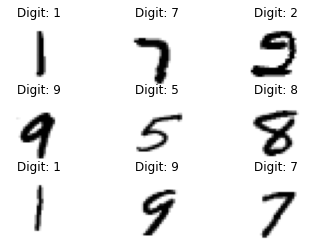

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#1
title = "Digit: "+str(y_train[12])
plt.subplot(3,3,1)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[12],cmap=mpl.cm.binary)

#2
title = "Digit: "+str(y_train[300])
plt.subplot(3,3,2)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[300],cmap=mpl.cm.binary)

#3
title = "Digit: "+str(y_train[129])
plt.subplot(3,3,3)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[129],cmap=mpl.cm.binary)

#4
title = "Digit: "+str(y_train[1225])
plt.subplot(3,3,4)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[1225],cmap=mpl.cm.binary)

#5
title = "Digit: "+str(y_train[10301])
plt.subplot(3,3,5)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[10301],cmap=mpl.cm.binary)

#6
title = "Digit: "+str(y_train[8436])
plt.subplot(3,3,6)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[8436],cmap=mpl.cm.binary)

#7
title = "Digit: "+str(y_train[2938])
plt.subplot(3,3,7)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[2938],cmap=mpl.cm.binary)

#8
title = "Digit: "+str(y_train[29123])
plt.subplot(3,3,8)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[29123],cmap=mpl.cm.binary)

#9
title = "Digit: "+str(y_train[54124])
plt.subplot(3,3,9)
plt.axis("OFF")
plt.title(title)
plt.imshow(x_train[54124],cmap=mpl.cm.binary)

## **Step 3 (2 points). Examine the frequency of classes in train, validation, and test set.**

Write codes to check the number of samples for every class in train, validation, and test set. We need to check if the data set is balanced or imbalanced dataset. You can either print out the class frequency, or visualize the class frequency.

In [ ]:
import pandas as pd
train_labels = pd.DataFrame(y_train, columns = ['Label'])
print("Frequency count for training set")
train_labels['Label'].value_counts()

Frequency count for training set


1    6179
7    5715
3    5638
2    5470
9    5454
0    5444
6    5417
8    5389
4    5307
5    4987
Name: Label, dtype: int64

In [ ]:
import pandas as pd
val_labels = pd.DataFrame(y_valid, columns = ['Label'])
print("Frequency count for validation set")
val_labels['Label'].value_counts()

Frequency count for validation set


1    563
7    550
4    535
6    501
9    495
3    493
2    488
0    479
8    462
5    434
Name: Label, dtype: int64

In [ ]:
import pandas as pd
test_labels = pd.DataFrame(y_test, columns = ['Label'])
print("Frequency count for test set")
test_labels['Label'].value_counts()

Frequency count for test set


1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: Label, dtype: int64

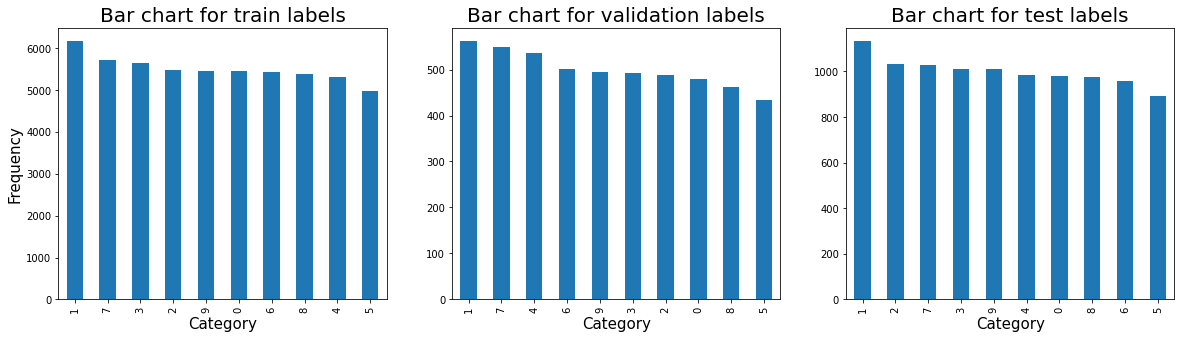

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.title("Bar chart for train labels",fontsize=20)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
train_labels['Label'].value_counts().plot(kind='bar',figsize=(20,5))
plt.subplot(1,3,2)
plt.title("Bar chart for validation labels",fontsize=20)
plt.xlabel('Category',fontsize=15)
val_labels['Label'].value_counts().plot(kind='bar',figsize=(20,5))
plt.subplot(1,3,3)
plt.title("Bar chart for test labels",fontsize=20)
plt.xlabel('Category',fontsize=15)
test_labels['Label'].value_counts().plot(kind='bar',figsize=(20,5))
plt.show()

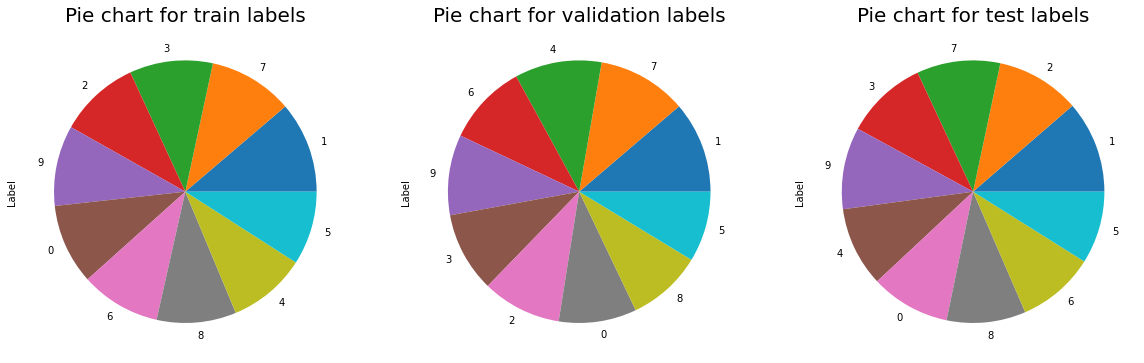

In [ ]:
plt.subplot(1,3,1)
plt.title("Pie chart for train labels",fontsize=20)
train_labels['Label'].value_counts().plot(kind='pie',figsize=(20,20))
plt.subplot(1,3,2)
plt.title("Pie chart for validation labels",fontsize=20)
val_labels['Label'].value_counts().plot(kind='pie',figsize=(20,20))
plt.subplot(1,3,3)
plt.title("Pie chart for test labels",fontsize=20)
test_labels['Label'].value_counts().plot(kind='pie',figsize=(20,20))
plt.show()

## **Step 4: (20 points) Build several classification models.  You need to fit each machine learning model on the training set (55000 images) and make predictions on the validation set (5000 images) and  test set (5000 images).**

(1) Softmax regression (Refer to sample codes in Textbook: P148-151)

In [ ]:
from sklearn.linear_model import LogisticRegression
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

(2) KNearest-neighbors (Refer to steps in Hw02: Build ML workflow for image classification)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')

(3) Deep Neural Network (Refer to sample codes in Textbook: P299-308, P341-344 and steps in Week 4-Lab II: SoftmaxClassifier & Neural Network)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
deep_neural_model = Sequential()
deep_neural_model.add(Dense(1000, input_shape=(784,), activation="relu"))
deep_neural_model.add(Dense(1000,activation="relu"))
deep_neural_model.add(Dense(1000,activation="relu"))
deep_neural_model.add(Dense(10,activation="softmax"))
deep_neural_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
deep_neural_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 2,797,010
Trainable params: 2,797,010
Non-trainable params: 0
_________________________________________________________________


(4) Support Vector Machine  (Refer to sample codes in Textbook: P153-160)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.svm import LinearSVC
svm_clf =  Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])

(5) Decision Tree  (Refer to sample codes in Textbook: P175-179)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=10)

(6) Random Forest  (Refer to sample codes in Textbook: P189-197)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100)

(7) Convolutional Neural Network  (Refer to sample codes in Textbook: P460-462, and steps in Week 5-LabI: class practice for neural network training)

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

### **Task 4.1: Proper feature scaling (Standardization  or Min-Max normalization) on the training, validation and test set**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_flatten)
x_train_scaled = scaler.transform(x_train_flatten)
x_test_scaled = scaler.transform(x_test_flatten)
x_valid_scaled = scaler.transform(x_valid_flatten)

### **Task 4.2: Report running time of model training for all methods above.**

Softmax regression

In [ ]:
import time
start = time.time()
softmax_model.fit(x_train_flatten,y_train)
end = time.time()
softmax_time_duration = end-start

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Program finishes in {} seconds:".format(softmax_time_duration))

Program finishes in 38.03665018081665 seconds:


KNearest-neighbors

In [ ]:
import time
start = time.time()
knn_model.fit(x_train_flatten,y_train)
end = time.time()
knn_time_duration = end-start

In [ ]:
print("Program finishes in {} seconds:".format(knn_time_duration))

Program finishes in 0.009105920791625977 seconds:


Deep Neural Network

In [ ]:
import time
start = time.time()
deep_neural_model.fit(x_train_flatten,y_train_onehot,epochs=20,batch_size=128,validation_data=(x_valid_flatten,y_valid_onehot))
end = time.time()
deep_neural_time_duration = end-start

Epoch 1/20
430/430 [==============================] - 23s 52ms/step - loss: 3.2083 - accuracy: 0.9034 - val_loss: 0.1775 - val_accuracy: 0.9494
Epoch 2/20
430/430 [==============================] - 22s 51ms/step - loss: 0.1230 - accuracy: 0.9637 - val_loss: 0.1399 - val_accuracy: 0.9652
Epoch 3/20
430/430 [==============================] - 23s 54ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.1573 - val_accuracy: 0.9580
Epoch 4/20
430/430 [==============================] - 24s 56ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.1393 - val_accuracy: 0.9678
Epoch 5/20
430/430 [==============================] - 26s 60ms/step - loss: 0.0794 - accuracy: 0.9773 - val_loss: 0.1713 - val_accuracy: 0.9602
Epoch 6/20
430/430 [==============================] - 22s 51ms/step - loss: 0.0690 - accuracy: 0.9798 - val_loss: 0.1267 - val_accuracy: 0.9654
Epoch 7/20
430/430 [==============================] - 23s 53ms/step - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.1359 - val_accuracy:

In [ ]:
print("Program finishes in {} seconds:".format(deep_neural_time_duration))

Program finishes in 469.9844460487366 seconds:


Support Vector Machine

In [ ]:
import time
start = time.time()
svm_clf.fit(x_train_flatten,y_train)
end = time.time()
svm_time_duration = end-start

In [ ]:
print("Program finishes in {} seconds:".format(svm_time_duration))

Decision Tree

In [ ]:
import time
start = time.time()
tree_clf.fit(x_train_flatten,y_train)
end = time.time()
tree_time_duration = end-start

In [ ]:
print("Program finishes in {} seconds:".format(tree_time_duration))

Random Forest

In [ ]:
import time
start = time.time()
rf_clf.fit(x_train_flatten,y_train)
end = time.time()
rf_time_duration = end-start

In [ ]:
print("Program finishes in {} seconds:".format(rf_time_duration))

Convolutional Neural Network

In [ ]:
import time
start = time.time()
cnn_model.fit(x_train,y_train_onehot,epochs=20,batch_size=128,validation_data=(x_valid,y_valid_onehot))
end = time.time()
cnn_time_duration = end-start

In [ ]:
print("Program finishes in {} seconds:".format(cnn_time_duration))

### **Task 4.3: Calculate the overall accuracy of the predictions over training set, validation set and test set.**

Softmax regression

In [ ]:
y_train_predicted_softmax = softmax_model.predict(x_train_flatten)
y_valid_predicted_softmax = softmax_model.predict(x_valid_flatten)
y_test_predicted_softmax = softmax_model.predict(x_test_flatten)

In [ ]:
from sklearn.metrics import accuracy_score
trainAcc_softmax = accuracy_score(y_train, y_train_predicted_softmax)
validAcc_softmax = accuracy_score(y_valid,y_valid_predicted_softmax)
testAcc_softmax = accuracy_score(y_test,y_test_predicted_softmax)
print("Accuracy score of train set: ",trainAcc_softmax)
print("Accuracy score of Validation set: ",validAcc_softmax)
print("Accuracy score of test set: ",testAcc_softmax)

KNearest-neighbors

In [ ]:
y_train_predicted_knn = knn_model.predict(x_train_flatten)
y_valid_predicted_knn = knn_model.predict(x_valid_flatten)
y_test_predicted_knn = knn_model.predict(x_test_flatten)

In [ ]:
from sklearn.metrics import accuracy_score
trainAcc_knn = accuracy_score(y_train, y_train_predicted_knn)
validAcc_knn = accuracy_score(y_valid,y_valid_predicted_knn)
testAcc_knn = accuracy_score(y_test,y_test_predicted_knn)
print("Accuracy score of train set: ",trainAcc_knn)
print("Accuracy score of Validation set: ",validAcc_knn)
print("Accuracy score of test set: ",testAcc_knn)

Deep Neural Network

In [ ]:
import numpy as np
y_train_predicted_deepNeural = np.argmax(deep_neural_model.predict(x_train_flatten),axis=1)
y_valid_predicted_deepNeural = np.argmax(deep_neural_model.predict(x_valid_flatten),axis=1)
y_test_predicted_deepNeural = np.argmax(deep_neural_model.predict(x_test_flatten),axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
trainAcc_deepNeural = accuracy_score(y_train, y_train_predicted_deepNeural)
validAcc_deepNeural = accuracy_score(y_valid,y_valid_predicted_deepNeural)
testAcc_deepNeural = accuracy_score(y_test,y_test_predicted_deepNeural)
print("Accuracy score of train set: ",trainAcc_deepNeural)
print("Accuracy score of Validation set: ",validAcc_deepNeural)
print("Accuracy score of test set: ",testAcc_deepNeural)

Support Vector Machine

In [ ]:
#y_train_predicted_softmax = softmax_model.predict(x_train_flatten)
#y_valid_predicted_softmax = softmax_model.predict(x_valid_flatten)
#y_test_predicted_softmax = softmax_model.predict(x_test_flatten)

Decision Tree

In [ ]:
y_train_predicted_tree = tree_clf.predict(x_train_flatten)
y_valid_predicted_tree = tree_clf.predict(x_valid_flatten)
y_test_predicted_tree = tree_clf.predict(x_test_flatten)

In [ ]:
from sklearn.metrics import accuracy_score
trainAcc_tree = accuracy_score(y_train, y_train_predicted_tree)
validAcc_tree = accuracy_score(y_valid,y_valid_predicted_tree)
testAcc_tree = accuracy_score(y_test,y_test_predicted_tree)
print("Accuracy score of train set: ",trainAcc_tree)
print("Accuracy score of Validation set: ",validAcc_tree)
print("Accuracy score of test set: ",testAcc_tree)

Random Forest

In [ ]:
y_train_predicted_rf = rf_clf.predict(x_train_flatten)
y_valid_predicted_rf = rf_clf.predict(x_valid_flatten)
y_test_predicted_rf = rf_clf.predict(x_test_flatten)

In [ ]:
from sklearn.metrics import accuracy_score
trainAcc_rf = accuracy_score(y_train, y_train_predicted_rf)
validAcc_rf = accuracy_score(y_valid,y_valid_predicted_rf)
testAcc_rf = accuracy_score(y_test,y_test_predicted_rf)
print("Accuracy score of train set: ",trainAcc_rf)
print("Accuracy score of Validation set: ",validAcc_rf)
print("Accuracy score of test set: ",testAcc_rf)

 Convolutional Neural Network

In [ ]:
import numpy as np
y_train_predicted_cnn = np.argmax(cnn_model.predict(x_train),axis=1)
y_valid_predicted_cnn = np.argmax(cnn_model.predict(x_valid),axis=1)
y_test_predicted_cnn = np.argmax(cnn_model.predict(x_test),axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
trainAcc_cnn = accuracy_score(y_train, y_train_predicted_cnn)
validAcc_cnn = accuracy_score(y_valid,y_valid_predicted_cnn)
testAcc_cnn = accuracy_score(y_test,y_test_predicted_cnn)
print("Accuracy score of train set: ",trainAcc_cnn)
print("Accuracy score of Validation set: ",validAcc_cnn)
print("Accuracy score of test set: ",testAcc_cnn)

### **Task 4.4: Calculate the per-class accuracy of the predictions over training set, validation set and test set.**
 For instance, among images of every class, how many of them are correctly predicted.

Softmax regression

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_predicted_softmax)
print("Per-class accuracy of train set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_valid, y_valid_predicted_softmax)
print("Per-class accuracy of validation set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_predicted_softmax)
print("Per-class accuracy of test set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

KNearest-neighbors

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_predicted_knn)
print("Per-class accuracy of train set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_valid, y_valid_predicted_knn)
print("Per-class accuracy of validation set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_predicted_knn)
print("Per-class accuracy of test set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

Deep Neural Network

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_predicted_deepNeural)
print("Per-class accuracy of train set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_valid, y_valid_predicted_deepNeural)
print("Per-class accuracy of validation set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_predicted_deepNeural)
print("Per-class accuracy of test set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

Support Vector Machine

Decision Tree

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_predicted_tree)
print("Per-class accuracy of train set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_valid, y_valid_predicted_tree)
print("Per-class accuracy of validation set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_predicted_tree)
print("Per-class accuracy of test set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

Random Forest

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_predicted_rf)
print("Per-class accuracy of train set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_valid, y_valid_predicted_rf)
print("Per-class accuracy of validation set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_predicted_rf)
print("Per-class accuracy of test set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

 Convolutional Neural Network

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_predicted_cnn)
print("Per-class accuracy of train set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_valid, y_valid_predicted_cnn)
print("Per-class accuracy of validation set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_predicted_cnn)
print("Per-class accuracy of test set:")
dia=np.diagonal(matrix)
c=len(matrix)
for i in range(0,c):
  sum=0
  for j in range(0,c):
    sum=sum+matrix[i][j]
  accur=dia[i]/sum
  print('Accuracy of label ',i,'is:',round(accur,6),'(',round((accur*100),3),'%)')

### **Task 4.5: Visualize the classification confusion matrix on training, validation and test set to check the details of predictions over every class.**

Softmax regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted_softmax)
plt.title("Classification Confusion matrix Training Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_softmax)
plt.title("Classification Confusion matrix Validation Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_softmax)
plt.title("Classification Confusion matrix Test Set")
plt.show()

KNearest-neighbors

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted_knn)
plt.title("Classification Confusion matrix Training Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_softmax)
plt.title("Classification Confusion matrix Validation Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_softmax)
plt.title("Classification Confusion matrix Test Set")
plt.show()

Deep Neural Network

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted_deepNeural)
plt.title("Classification Confusion matrix Training Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_deepNeural)
plt.title("Classification Confusion matrix Validation Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_deepNeural)
plt.title("Classification Confusion matrix Test Set")
plt.show()

Support Vector Machine

Decision Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted_tree)
plt.title("Classification Confusion matrix Training Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_tree)
plt.title("Classification Confusion matrix Validation Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_tree)
plt.title("Classification Confusion matrix Test Set")
plt.show()

Random Forest

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted_rf)
plt.title("Classification Confusion matrix Training Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_rf)
plt.title("Classification Confusion matrix Validation Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_rf)
plt.title("Classification Confusion matrix Test Set")
plt.show()

Convolutional Neural Network

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted_cnn)
plt.title("Classification Confusion matrix Training Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_cnn)
plt.title("Classification Confusion matrix Validation Set")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_cnn)
plt.title("Classification Confusion matrix Test Set")
plt.show()

### **Task 4.6: Save the trained model to disk.**

Softmax regression

In [ ]:
import pickle
pickle.dump(softmax_model, open('softmax_model.pkl', 'wb'))

KNearest-neighbors

In [ ]:
import pickle
pickle.dump(knn_model, open('knn_model.pkl', 'wb'))

Deep Neural Network

In [ ]:
deep_neural_model.save("deep_neural_model.h5")

Support Vector Machine

In [ ]:
#import pickle
#pickle.dump(svm_clf, open('svm_clf.pkl', 'wb'))

Decision Tree

In [ ]:
import pickle
pickle.dump(tree_clf, open('tree_clf.pkl', 'wb'))

Random Forest

In [ ]:
import pickle
pickle.dump(rf_clf, open('rf_clf.pkl', 'wb'))

Convolutional Neural Network

In [ ]:
cnn_model.save("cnn_model.h5")

### **Task 4.7: Summarize the classification accuracy into the following table (Pandas dataframe is recommended)**

In [ ]:
Softmax_dict = dict({"Model":"SoftMax Regression","Training time(secs)": softmax_time_duration,"Training accuracy":trainAcc_softmax,"Validation accuracy":validAcc_softmax,"Testing accuracy":testAcc_softmax})
knn_dict = dict({"Model":"KNearest-neighbors","Training time(secs)": knn_time_duration,"Training accuracy":trainAcc_knn,"Validation accuracy":validAcc_knn,"Testing accuracy":testAcc_knn})
deepNeural_dict = dict({"Model":"Deep Neural Network","Training time(secs)": deep_neural_time_duration,"Training accuracy":trainAcc_deepNeural,"Validation accuracy":validAcc_deepNeural,"Testing accuracy":testAcc_deepNeural})
#Svm_dict = dict({"Model":"Support Vector Machine","Training time(secs)": svm_time_duration,"Training accuracy":trainAcc_svm,"Validation accuracy":validAcc_svm,"Testing accuracy":testAcc_svm})
tree_dict = dict({"Model":"Decision Tree","Training time(secs)": tree_time_duration,"Training accuracy":trainAcc_tree,"Validation accuracy":validAcc_tree,"Testing accuracy":testAcc_tree})
rf_dict = dict({"Model":"Random Forest","Training time(secs)": rf_time_duration,"Training accuracy":trainAcc_rf,"Validation accuracy":validAcc_rf,"Testing accuracy":testAcc_rf})
cnn_dict = dict({"Model":"Convolutional Neural Network","Training time(secs)": cnn_time_duration,"Training accuracy":trainAcc_cnn,"Validation accuracy":validAcc_cnn,"Testing accuracy":testAcc_cnn})

In [ ]:
import pandas as pd
table_df=pd.DataFrame.from_dict([Softmax_dict,knn_dict,deepNeural_dict,tree_dict,rf_dict,cnn_dict])
table_df

## **Step 5: (20 points) Apply principal component analysis on dataset**

### **Task 5.1: Apply PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95% (Refer to steps in Textbook: P219-223, or steps in Week6-Lab I: Dimension_Reduction). Print the shape of the new training, validation, and test set.**

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=0.95)
x_train_reduced = pca1.fit_transform(x_train_flatten)
x_valid_reduced = pca1.transform(x_valid_flatten)
x_test_reduced = pca1.transform(x_test_flatten)

In [ ]:
print("X_train_reduced.shape: ", x_train_reduced.shape)
print("X_valid_reduced.shape: ", x_valid_reduced.shape)
print("X_test_reduced.shape: ", x_test_reduced.shape)

### **Task 5.2: Train all ML methods in Task 4 on the new reduced dataset to summarize the classification accuracy into the following table (Pandas dataframe is recommended)**

Softmax regression

In [ ]:
from sklearn.linear_model import LogisticRegression
softmax_model_t5 = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
import time
start = time.time()
softmax_model_t5.fit(x_train_reduced,y_train)
end = time.time()
softmax_t5_time_duration = end-start
y_train_predicted_softmax_t5 = softmax_model_t5.predict(x_train_reduced)
y_valid_predicted_softmax_t5 = softmax_model_t5.predict(x_valid_reduced)
y_test_predicted_softmax_t5 = softmax_model_t5.predict(x_test_reduced)
from sklearn.metrics import accuracy_score
trainAcc_softmax_t5 = accuracy_score(y_train, y_train_predicted_softmax_t5)
validAcc_softmax_t5 = accuracy_score(y_valid,y_valid_predicted_softmax_t5)
testAcc_softmax_t5 = accuracy_score(y_test,y_test_predicted_softmax_t5)

KNearest-neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_t5 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
import time
start = time.time()
knn_model_t5.fit(x_train_reduced,y_train)
end = time.time()
knn_t5_time_duration = end-start
y_train_predicted_knn_t5 = knn_model_t5.predict(x_train_reduced)
y_valid_predicted_knn_t5 = knn_model_t5.predict(x_valid_reduced)
y_test_predicted_knn_t5 = knn_model_t5.predict(x_test_reduced)
from sklearn.metrics import accuracy_score
trainAcc_knn_t5 = accuracy_score(y_train, y_train_predicted_knn_t5)
validAcc_knn_t5 = accuracy_score(y_valid,y_valid_predicted_knn_t5)
testAcc_knn_t5 = accuracy_score(y_test,y_test_predicted_knn_t5)

Deep Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
deep_neural_model_t5 = Sequential()
deep_neural_model_t5.add(Dense(1000, input_shape=(154,), activation="relu"))
deep_neural_model_t5.add(Dense(1000,activation="relu"))
deep_neural_model_t5.add(Dense(10,activation="softmax"))
deep_neural_model_t5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
deep_neural_model_t5.summary()
import time
start = time.time()
deep_neural_model_t5.fit(x_train_reduced,y_train)
end = time.time()
deepNeural_t5_time_duration = end-start
y_train_predicted_deepNeural_t5 = deep_neural_model_t5.predict(x_train_reduced)
y_valid_predicted_deepNeural_t5 = deep_neural_model_t5.predict(x_valid_reduced)
y_test_predicted_deepNeural_t5 = deep_neural_model_t5.predict(x_test_reduced)
from sklearn.metrics import accuracy_score
trainAcc_deepNeural_t5 = accuracy_score(y_train, y_train_predicted_deepNeural_t5)
validAcc_deepNeural_t5 = accuracy_score(y_valid,y_valid_predicted_deepNeural_t5)
testAcc_deepNeural_t5 = accuracy_score(y_test,y_test_predicted_deepNeural_t5)

Support Vector Machine

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf_t5 =  Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
import time
start = time.time()
svm_clf_t5.fit(x_train_reduced,y_train)
end = time.time()
svm_t5_time_duration = end-start
y_train_predicted_svm_t5 = svm_clf_t5.predict(x_train_reduced)
y_valid_predicted_svm_t5 = svm_clf_t5.predict(x_valid_reduced)
y_test_predicted_svm_t5 = svm_clf_t5.predict(x_test_reduced)
from sklearn.metrics import accuracy_score
trainAcc_svm_t5 = accuracy_score(y_train, y_train_predicted_svm_t5)
validAcc_svm_t5 = accuracy_score(y_valid,y_valid_predicted_svm_t5)
testAcc_svm_t5 = accuracy_score(y_test,y_test_predicted_svm_t5)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf_t5 = DecisionTreeClassifier(max_depth=10)
import time
start = time.time()
tree_clf_t5.fit(x_train_reduced,y_train)
end = time.time()
tree_t5_time_duration = end-start
y_train_predicted_tree_t5 = tree_clf_t5.predict(x_train_reduced)
y_valid_predicted_tree_t5 = tree_clf_t5.predict(x_valid_reduced)
y_test_predicted_tree_t5 = tree_clf_t5.predict(x_test_reduced)
from sklearn.metrics import accuracy_score
trainAcc_tree_t5 = accuracy_score(y_train, y_train_predicted_tree_t5)
validAcc_tree_t5 = accuracy_score(y_valid,y_valid_predicted_tree_t5)
testAcc_tree_t5 = accuracy_score(y_test,y_test_predicted_tree_t5)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_t5=RandomForestClassifier(n_estimators=100)
import time
start = time.time()
rf_clf_t5.fit(x_train_reduced,y_train)
end = time.time()
rf_t5_time_duration = end-start
y_train_predicted_rf_t5 = rf_clf_t5.predict(x_train_reduced)
y_valid_predicted_rf_t5 = rf_clf_t5.predict(x_valid_reduced)
y_test_predicted_rf_t5 = rf_clf_t5.predict(x_test_reduced)
from sklearn.metrics import accuracy_score
trainAcc_rf_t5 = accuracy_score(y_train, y_train_predicted_rf_t5)
validAcc_rf_t5 = accuracy_score(y_valid,y_valid_predicted_rf_t5)
testAcc_rf_t5 = accuracy_score(y_test,y_test_predicted_rf_t5)

In [ ]:
Softmax_dict_t5 = dict({"Model":"SoftMax Regression","Training time(secs)": softmax_t5_time_duration,"Training accuracy":trainAcc_softmax_t5,"Validation accuracy":validAcc_softmax_t5,"Testing accuracy":testAcc_softmax_t5})
knn_dict_t5 = dict({"Model":"KNearest-neighbors","Training time(secs)": knn_t5_time_duration,"Training accuracy":trainAcc_knn_t5,"Validation accuracy":validAcc_knn_t5,"Testing accuracy":testAcc_knn_t5})
deepNeural_dict_t5 = dict({"Model":"Deep Neural Network","Training time(secs)": deepNeural_t5_time_duration,"Training accuracy":trainAcc_deepNeural_t5,"Validation accuracy":validAcc_deepNeural_t5,"Testing accuracy":testAcc_deepNeural_t5})
#Svm_dict_t5 = dict({"Model":"Support Vector Machine","Training time(secs)": svm_t5_time_duration,"Training accuracy":trainAcc_svm_t5,"Validation accuracy":validAcc_svm_t5,"Testing accuracy":testAcc_svm_t5})
tree_dict_t5 = dict({"Model":"Decision Tree","Training time(secs)": tree_t5_time_duration,"Training accuracy":trainAcc_tree_t5,"Validation accuracy":validAcc_tree_t5,"Testing accuracy":testAcc_tree_t5})
rf_dict_t5 = dict({"Model":"Random Forest","Training time(secs)": rf_t5_time_duration,"Training accuracy":trainAcc_rf_t5,"Validation accuracy":validAcc_rf_t5,"Testing accuracy":testAcc_rf_t5})

In [ ]:
import pandas as pd
table_df=pd.DataFrame.from_dict([Softmax_dict,knn_dict,deepNeural_dict,tree_dict,rf_dict,cnn_dict])
table_df

### **Task 5.3: Based on your observation, was training much faster when using reduced dataset compared to the model training on Task 4?**

### **Task 5.4: Based on your observation, did you see improved, similar, or reduced performance when training models on full dataset and reduced dataset?**

## **Step 6: (10 points) Applying clustering analysis on the feature data to discover the patterns among samples.**

### **Task 6.1: Get small dataset by sampling same number of images per class from the training data. To simplify the analysis, you can sample at most 50 images per class from the training data.**

In [ ]:
import numpy as np
sampled_set_x=[]
sampled_set_y=[]
for i in range(0,10):
  count=0
  for j in range(0,55000):
    if(count>50):
      break
    if(y_train[j]==i):
      sampled_set_x.append(x_train_scaled[j])
      sampled_set_y.append(y_train[j])
      count+=1
x_train_sampled=np.array(sampled_set_x)
y_train_sampled=np.array(sampled_set_y)

### **Task 6.2: Use PCA or t-SNE to reduce the small dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each images' target class (refer to steps in Week6-Lab I: Dimension_Reduction).**

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

X_tsne_reduced = tsne.fit_transform(x_train_sampled)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c= y_train_sampled, cmap='jet')  # color by real labels
plt.colorbar()
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2md dimension", fontsize=18)
plt.title("Clustering Images using T-SNE Dimension Reduction", fontsize=12)
plt.show()

### **Task 6.3: Cluster the images using K-means, determine the optimal number of clusters using silhousette score. (Refer to steps in Textbook: P238-247)**

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10)
kmeans_model.fit(x_train_sampled)

In [ ]:
train_cluster_labels = kmeans_model.predict(x_train_sampled)
test_cluster_labels = kmeans_model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import silhouette_score

elbow={"inertia":[],"clusters":[]}
silhouette={"silhouette":[],"clusters":[]}
scaled_subset_x=x_train_scaled[0:10000]
scaled_subset_y=y_train[0:10000]

for i in range(3,12):
   print("Clustering data into ", i, ' groups')
   kmeans_model=KMeans(i)
   elbow["clusters"].append(i)
   kmeans_model.fit(scaled_subset_x)
   elbow["inertia"].append(kmeans_model.inertia_)
   silhouette["silhouette"].append(silhouette_score(scaled_subset_x,kmeans_model.labels_))

In [ ]:
plt.scatter(x=elbow["clusters"],y=silhouette["silhouette"])
plt.plot(elbow["clusters"], silhouette["silhouette"])
plt.xlabel("n_clusters", size=20)
plt.ylabel("Silhouette score", size=20)
plt.title("Silhouette Graph", size=20)
plt.show()

From above graph the optimal number of clusters would be 8

In [ ]:
plt.scatter(x=elbow["clusters"],y=elbow["inertia"])
plt.plot(elbow["clusters"], elbow["inertia"])
plt.xlabel("n_clusters", size=20)
plt.ylabel("inertia", size=20)
plt.title("Elbow Graph", size=20)
plt.show()

### **Task 6.4: Given the optimal clusters from Task 6.3, visualize the images in every cluster: do you see similar faces in each cluster?**

In [ ]:
# Step 5: visualize the images in each cluster from K-means
img_idx = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
for cluster_id in set(train_cluster_labels):
    cluster_images = x_train_sampled[train_cluster_labels==cluster_id]

    for i in range(10):
        plt.subplot(10,10,img_idx+1)
        plt.imshow(cluster_images[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.axis('off')
        if i == 0: plt.title("Cluster {}".format(cluster_id))
        img_idx += 1

Yes, I can see similar faces in some clusters